<a href="https://colab.research.google.com/github/Ixiondbz/CSE499/blob/main/Patches_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import os
import random
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from google.colab.patches import cv2_imshow
import json
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/drive')

folder = "MyDrive/MIDOG_Challenge"
midog_folder = Path("/drive") / Path(folder)
print(list(midog_folder.glob("*.*")))

Mounted at /drive
[PosixPath('/drive/MyDrive/MIDOG_Challenge/MIDOG.sqlite'), PosixPath('/drive/MyDrive/MIDOG_Challenge/MIDOG.json')]


In [3]:
image_folder = Path("/content/drive/MyDrive/CSE499 Project/train_images")

hamamatsu_rx_ids = list(range(0, 51))
hamamatsu_360_ids = list(range(51, 101))
aperio_ids = list(range(101, 151))
leica_ids = list(range(151, 201))


annotation_file = midog_folder / "MIDOG.json"
rows = []
with open(annotation_file) as f:
    data = json.load(f)

    categories = {1: 'mitotic figure', 2: 'hard negative'}

    for row in data["images"]:
        file_name = row["file_name"]
        image_id = row["id"]
        width = row["width"]
        height = row["height"]

        scanner  = "Hamamatsu XR"
        if image_id in hamamatsu_360_ids:
            scanner  = "Hamamatsu S360"
        if image_id in aperio_ids:
            scanner  = "Aperio CS"
        if image_id in leica_ids:
            scanner  = "Leica GT450"
         
        for annotation in [anno for anno in data['annotations'] if anno["image_id"] == image_id]:
            box = annotation["bbox"]
            cat = categories[annotation["category_id"]]

            rows.append([file_name, image_id, width, height, box, cat, scanner])
        
df = pd.DataFrame(rows, columns=["file_name", "image_id", "width", "height", "box", "cat", "scanner"])

In [4]:
df.drop(df[df['cat']=='hard negative'].index,inplace=True)

In [ ]:
df

file_name  image_id  ...             cat       scanner
5     002.tiff         2  ...  mitotic figure  Hamamatsu XR
6     002.tiff         2  ...  mitotic figure  Hamamatsu XR
8     002.tiff         2  ...  mitotic figure  Hamamatsu XR
9     002.tiff         2  ...  mitotic figure  Hamamatsu XR
12    002.tiff         2  ...  mitotic figure  Hamamatsu XR
...        ...       ...  ...             ...           ...
4421  150.tiff       150  ...  mitotic figure     Aperio CS
4427  150.tiff       150  ...  mitotic figure     Aperio CS
4428  150.tiff       150  ...  mitotic figure     Aperio CS
4429  150.tiff       150  ...  mitotic figure     Aperio CS
4431  150.tiff       150  ...  mitotic figure     Aperio CS

[1721 rows x 7 columns]

In [5]:
dataset_1 = df[df['scanner']=='Hamamatsu XR']
dataset_2 = df[df['scanner']=='Hamamatsu S360']
dataset_3 = df[df['scanner']=='Aperio CS']
#dataset_4 = df[df['scanner']=='Leica GT450']

In [ ]:
len(dataset_1['file_name'].unique())

44

In [ ]:
left  = 1842
top   = 1558
right = 1892
bottom= 1608

In [ ]:
image = cv2.imread('/drive/MyDrive/CSE499 Project/train_images/002.tiff')

In [ ]:
image.shape

(5412, 7215, 3)

In [ ]:
dataframe = df[df['file_name']=='002.tiff']

In [ ]:
boxes = dataframe['box']

for box in range(boxes.size):
  fig, ax = plt.subplots()
  left  = int(boxes.iloc[box][0])
  top   = int(boxes.iloc[box][1])
  right = int(boxes.iloc[box][2])
  bottom= int(boxes.iloc[box][3])

  # cropped_image = image[top-50:bottom+50, left-50:right+50]
  cropped_image = image[top:bottom, left:right]
  ax.imshow(cropped_image)
  # rect = patches.Rectangle((50,50),50,50, linewidth=2, edgecolor='b', facecolor='none')
  # ax.add_patch(rect)
  plt.show()

In [ ]:
boxes = dataframe['box']

for box in range(boxes.size):
  fig, ax = plt.subplots()
  left  = int(boxes.iloc[box][0])
  top   = int(boxes.iloc[box][1])
  right = int(boxes.iloc[box][2])
  bottom= int(boxes.iloc[box][3])

  cropped_image = image[top-50:bottom+50, left-50:right+50]
  #cropped_image = image[top:bottom, left:right]
  ax.imshow(cropped_image)
  rect = patches.Rectangle((50,50),50,50, linewidth=2, edgecolor='b', facecolor='none')
  ax.add_patch(rect)
  plt.show()

In [ ]:
7215/481
5412/451

12.0

In [ ]:
image = cv2.imread('/drive/MyDrive/CSE499 Project/train_images/003.tiff')

In [ ]:
dataframe = df[df['file_name']=='003.tiff']
boxes = dataframe['box']

In [ ]:
boxes = list(boxes)

In [ ]:
len(boxes)

11

In [ ]:
for y in range(0,height+1,451):
  for x in range(0,width+1,481):
    print(y/451, x/481)

In [ ]:
count=0

In [ ]:
height=5412
width=7215
image = cv2.imread('/drive/MyDrive/CSE499 Project/train_images/003.tiff')
dataframe = df[df['file_name']=='003.tiff']
boxes = dataframe['box']
boxes = list(boxes)
fig, ax = plt.subplots(12,15,figsize=(50,50))
for y in range(0,height,451):
  for x in range(0,width,481):
    left  = x
    top   = y
    right = x+481
    bottom= y+451
    
    cropped_image = image[top:bottom, left:right]
    

    labels = []

    for xmin,ymin,xmax,ymax in boxes:
      if (xmin>=left and xmax<=right) and (ymin>=top and ymax<=bottom):
        labels.append([xmin,ymin,xmax,ymax])
      else:
        XMIN,YMIN,XMAX,YMAX=xmin,ymin,xmax,ymax
        if (YMIN>=top and YMAX<=bottom and YMIN<YMAX) or (XMIN>=left and XMAX<=right and XMIN<XMAX):
        #if (YMIN>=top and YMAX<=bottom and YMIN<YMAX):  
          if XMIN>=left and XMIN<=right and XMAX>right:
            XMAX=right
            labels.append([XMIN,YMIN,XMAX,YMAX])
          elif XMAX>=left and XMAX<=right and XMIN<left:
            XMIN=left
            labels.append([XMIN,YMIN,XMAX,YMAX])
        #elif (XMIN>=left and XMAX<=right and XMIN<XMAX):
          if YMIN>=top and YMIN<=bottom and YMAX>bottom:
            YMAX=bottom
            labels.append([XMIN,YMIN,XMAX,YMAX])
          elif YMAX>=top and YMAX<=bottom and YMIN<top:
            YMIN=top 
            labels.append([XMIN,YMIN,XMAX,YMAX])

    if len(labels)>0:
      ax[int(y/451),int(x/481)].imshow(cropped_image)
      count+=len(labels)

    for xmin,ymin,xmax,ymax in labels:
      #ymin-top
      rect = patches.Rectangle((xmin-left,ymin-top),xmax-xmin,ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
      ax[int(y/451),int(x/481)].add_patch(rect)



In [ ]:
count

NameError: ignored

In [ ]:
len(boxes)

11

In [ ]:
print("{:03d}".format(2))

002


Hamamatsu XR /  Hamamatsu S360

In [ ]:
for filename in dataset_2['file_name'].unique():
  print(filename)

In [10]:
#5412 = 123, 132, 164, 246, 451, 492, 902, 1353, 1804, 2706
#7215 = 111, 185, 195, 481, 555, 1443, 2405
PatchCount = 0
height,width=5412,7215
DataFrame  = pd.DataFrame(columns=['file_name', 'image_id', 'width', 'height', 'box', 'cat', 'scanner'])

y_step =  246
x_step =  195

for filename in dataset_2['file_name'].unique():
  path = '/drive/MyDrive/CSE499 Project/train_images/'+filename

  image = cv2.imread(path)

  boxes = dataset_2[dataset_2['file_name']==filename]['box']
  
  for y in range(0,height,y_step):
    for x in range(0,width,x_step):
      left  = x
      top   = y
      right = x+481
      bottom= y+451
      
      cropped_image = image[top:bottom, left:right]
      

      labels = []

      for xmin,ymin,xmax,ymax in boxes:
        if (xmin>=left and xmax<=right and xmin<xmax) and (ymin>=top and ymax<=bottom and ymin<ymax):
          labels.append([xmin,ymin,xmax,ymax])
        # else:
        #   XMIN,YMIN,XMAX,YMAX=xmin,ymin,xmax,ymax
        #   if XMIN<XMAX and YMIN<YMAX:
        #     if (YMIN>=top and YMAX<=bottom and YMIN<YMAX) or (XMIN>=left and XMAX<=right and XMIN<XMAX):
        #       if (YMIN>=top and YMAX<=bottom and YMIN<YMAX):
        #         #fix x values
        #         if XMIN>=left and XMIN<=right and XMAX>right:
        #           XMAX=right
        #           if XMIN<XMAX and YMIN<YMAX:
        #             labels.append([XMIN,YMIN,XMAX,YMAX])
        #         elif XMAX>=left and XMAX<=right and XMIN<left:
        #           XMIN=left
        #           if XMIN<XMAX and YMIN<YMAX:
        #             labels.append([XMIN,YMIN,XMAX,YMAX])
        #       elif (XMIN>=left and XMAX<=right and XMIN<XMAX):
        #         #fix values of y axis
        #         if YMIN>=top and YMIN<=bottom and YMAX>bottom:
        #           YMAX=bottom
        #           if XMIN<XMAX and YMIN<YMAX:
        #             labels.append([XMIN,YMIN,XMAX,YMAX])
        #         elif YMAX>=top and YMAX<=bottom and YMIN<top:
        #           YMIN=top 
        #           if XMIN<XMAX and YMIN<YMAX:
        #             labels.append([XMIN,YMIN,XMAX,YMAX])
      
      if len(labels)>0:
        PatchCount+=1
        path="/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/"+"{:03d}".format(PatchCount)+'.tiff'
        cv2.imwrite(path,cropped_image)
        print(path)
        file_name = "{:03d}".format(PatchCount)+'.tiff'
        image_id  = PatchCount
        WIDTH,HEIGHT = 481,451
        cat       = 'mitotic figure'
        scanner   = 'Hamamatsu S360'
        for label in labels: 
          x_min,y_min,x_max,y_max=label
          box = [x_min-left,y_min-top,x_min-left+x_max-x_min,y_min-top+y_max-y_min]
          #lst = [file_name,image_id,WIDTH,HEIGHT,box,cat,scanner]
          df = pd.DataFrame([[file_name,image_id,WIDTH,HEIGHT,box,cat,scanner]], columns=['file_name','image_id','width',	'height',	'box','cat','scanner'])
          #df = df.infer_objects()
          DataFrame = DataFrame.append(df,ignore_index=True)
          

      # for xmin,ymin,xmax,ymax in labels:
      #   rect = patches.Rectangle((xmin-left,ymin-top),xmax-xmin,ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
      #   ax[int(y/451),int(x/481)].add_patch(rect)
DataFrame.to_pickle('/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/DataFrame.pkl')

/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/001.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/002.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/003.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/004.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/005.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/006.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/007.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/008.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/009.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/010.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/011.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/012.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/013.tiff
/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/014.tiff
/drive/MyDrive/CSE499 Project/Patc

In [11]:
type(DataFrame['box'][0])

list

In [12]:
import pandas as pd
stpdf=pd.read_pickle('/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/DataFrame.pkl')

In [16]:
stpdf['box'][270]

[278, 208, 328, 258]

In [14]:
for i in range(PatchCount):
  xmin,ymin,xmax,ymax=DataFrame.box[i]
  if xmin==xmax or ymin==ymax:
    print(i)

In [15]:
type(stpdf)

pandas.core.frame.DataFrame

In [17]:
!apt-get install python3-openslide
from openslide import open_slide

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  javascript-common libjs-jquery libopenslide0 python-asn1crypto
  python-blinker python-cffi-backend python-click python-colorama
  python-cryptography python-enum34 python-flask python-idna python-ipaddress
  python-itsdangerous python-jinja2 python-markupsafe
  python-openslide-examples python-openssl python-pkg-resources
  python-pyinotify python-simplejson python-six python-werkzeug
  python3-olefile python3-pil
Suggested packages:
  apache2 | lighttpd | httpd python-blinker-doc python-cryptography-doc
  python-cryptography-vectors python-enum34-doc python-flask-doc
  python-jinja2-doc python-openssl-doc python-openssl-dbg python-setuptools
  python-pyinotify-doc ipython python-genshi python-lxml python-greenlet
  python-redis python-pylibmc | python-memcache python-termcolor
  python-watchdog python-werkzeug-doc python-pil-doc python

In [18]:
import plotly.express as px

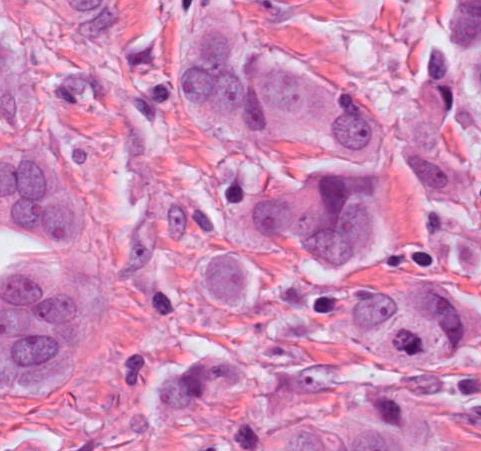

In [19]:
image = cv2.imread('/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360/001.tiff')

cv2_imshow(image)

In [20]:
DataFrame[DataFrame["image_id"] == 2]

file_name image_id  ...             cat         scanner
1  002.tiff        2  ...  mitotic figure  Hamamatsu S360

[1 rows x 7 columns]

In [21]:
DataFrame

file_name image_id  ...             cat         scanner
0      001.tiff        1  ...  mitotic figure  Hamamatsu S360
1      002.tiff        2  ...  mitotic figure  Hamamatsu S360
2      003.tiff        3  ...  mitotic figure  Hamamatsu S360
3      004.tiff        4  ...  mitotic figure  Hamamatsu S360
4      005.tiff        5  ...  mitotic figure  Hamamatsu S360
...         ...      ...  ...             ...             ...
2078  1862.tiff     1862  ...  mitotic figure  Hamamatsu S360
2079  1863.tiff     1863  ...  mitotic figure  Hamamatsu S360
2080  1864.tiff     1864  ...  mitotic figure  Hamamatsu S360
2081  1865.tiff     1865  ...  mitotic figure  Hamamatsu S360
2082  1866.tiff     1866  ...  mitotic figure  Hamamatsu S360

[2083 rows x 7 columns]

In [ ]:
for id, anno in DataFrame[DataFrame["image_id"] == 7].iterrows():
  print(id)
  print(anno)

6
file_name             007.tiff
image_id                     7
width                      481
height                     451
box          [32, 72, 82, 122]
cat             mitotic figure
scanner           Hamamatsu XR
Name: 6, dtype: object


In [26]:
img_id = 1
thumbail_size_big = 481
image_folder = Path('/drive/MyDrive/CSE499 Project/Patch Datasets/Hamamatsu S360')
slide = open_slide( str(image_folder / f"{img_id:03d}.tiff") )

image = slide.get_thumbnail((thumbail_size_big, thumbail_size_big))

fig = px.imshow(image)

scale_x = slide.level_dimensions[0][0] / image.size[0]
scale_y = slide.level_dimensions[0][1] / image.size[1]

for id, anno in DataFrame[DataFrame["image_id"] == img_id].iterrows():

    x0, y0, x1, y1 = anno.box[0] / scale_x, anno.box[1] / scale_y, anno.box[2] / scale_x, anno.box[3] / scale_y


    fig.add_shape(
        type='rect',
        x0=x0, x1=x1, y0=y0, y1=y1,
        xref='x', yref='y',
        line_color='red' if "mitotic" in anno["cat"] else "blue"
    )

fig.update_layout(
    autosize=False,
    width=image.size[0],
    height=image.size[1],
    )

fig.show()    